In [2]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read data

df = pd.read_csv('netflix1.csv', index_col = 0, header = 0)

In [4]:
# Basic Info

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, s1 to s8786
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      8790 non-null   object
 3   country       8790 non-null   object
 4   date_added    8790 non-null   object
 5   release_year  8790 non-null   int64 
 6   rating        8790 non-null   object
 7   duration      8790 non-null   object
 8   listed_in     8790 non-null   object
dtypes: int64(1), object(8)
memory usage: 686.7+ KB


No null values to handle

In [5]:
# Set up regex to find the numeric value in the duration column.
regex = re.compile(r"\d+")

# split the numeric value and unit of duration into separate columns.
df['duration_int'] = [re.findall(r'\d+',str(x))[0] for x in df['duration']]
df['duration_unit'] = [re.sub(r'\d+','', str(x)) for x in df['duration']]

df['duration_int'] = df['duration_int'].astype(int)
df['duration_unit'] = df['duration_unit'].astype(str)

df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in,duration_int,duration_unit
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,90,min
s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1,Season
s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1,Season
s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies",91,min
s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125,min


In [6]:

tv_show = df.iloc[:,[2,9,10]][(df['type'] == 'TV Show') & (df['director'] != 'Not Given')]

tv_summary = tv_show.groupby("director").agg(
    Avg_Duration = ("duration_int", "mean"),
    Max_Duration = ("duration_int","max")
)

tv_summary = pd.DataFrame(tv_summary).reindex()

tv_summary['director'] = tv_summary.index
tv_summary.reset_index(drop=True, inplace=True)

tv_summary['Avg_Duration'] = tv_summary['Avg_Duration'].round()
tv_summary



,Avg_Duration,Max_Duration,director
0,2.0,2,"Adrien Lagier, Ousmane Ly"
1,1.0,1,Adrián García Bogliano
2,1.0,1,Ah Loong
3,1.0,1,Ahmet Katıksız
4,1.0,1,Alain Brunard
...,...,...,...
220,1.0,1,Vijay S. Bhanushali
221,2.0,2,"Vikramaditya Motwane, Anurag Kashyap"
222,1.0,1,Wouter Bouvijn
223,5.0,5,Yasuhiro Irie


In [7]:
tv_summary.describe()

,Avg_Duration,Max_Duration
count,225.000000,225.000000
mean,1.635556,1.653333
std,1.783000,1.791548
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,15.000000,15.000000


In [8]:
top_tv_dir = tv_summary.sort_values(by='Avg_Duration',ascending=False).head()

display(top_tv_dir)

,Avg_Duration,Max_Duration,director
171,15.0,15,Phil Sgriccia
15,9.0,9,Andy Devonshire
172,9.0,9,Philippa Lowthorpe
68,9.0,9,Hayato Date
86,8.0,8,Jay Chandrasekhar


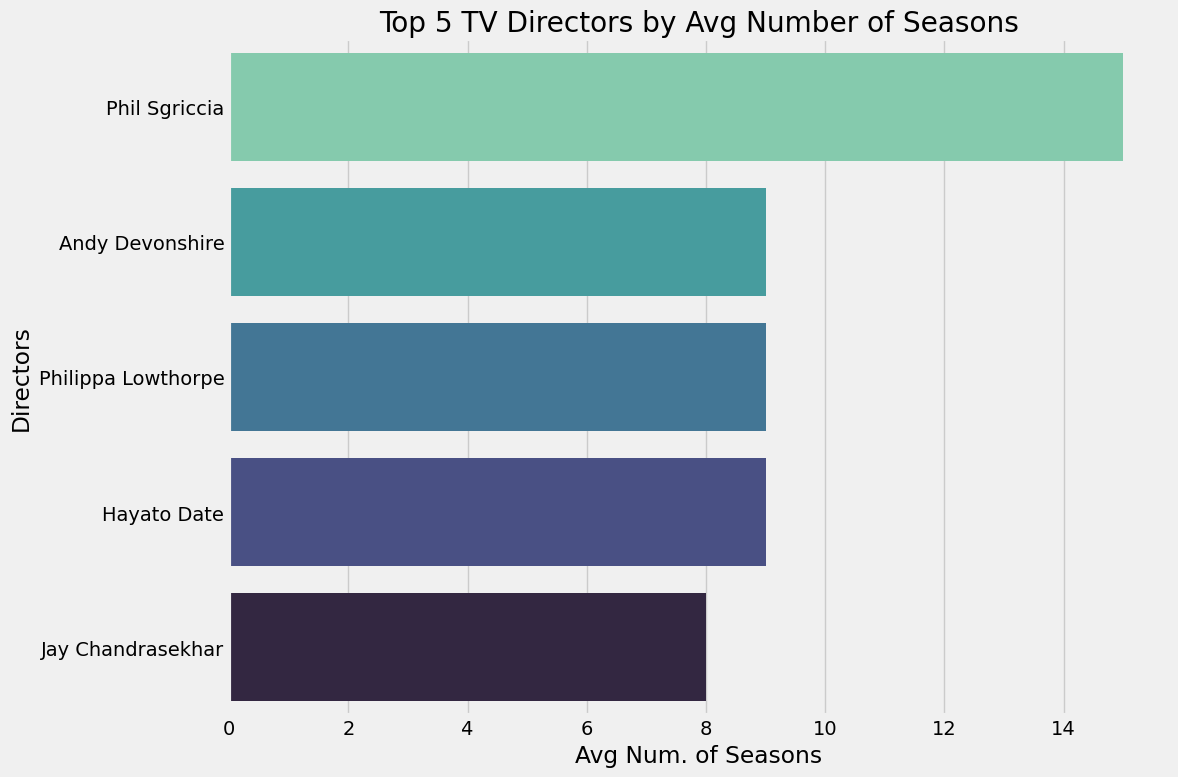

In [9]:
directors_order = top_tv_dir['director']

# Create vertical bar plot
f, ax = plt.subplots(figsize=(12, 8))  # Optional: adjust figure size
sns.barplot(y="director",x='duration_int',data=tv_show, palette="mako_r",order=directors_order,ax=ax)

# Add title and labels
plt.title('Top 5 TV Directors by Avg Number of Seasons')
plt.xlabel('Avg Num. of Seasons')
plt.ylabel('Directors')

# Show plot
plt.tight_layout()  # Optional: adjust layout
plt.show()

In [10]:
categories = []

for index, row in df.iterrows():
    for x in row['listed_in'].split(', '):
        if x not in categories:
            categories.append(x)

categories


['Documentaries',
 'Crime TV Shows',
 'International TV Shows',
 'TV Action & Adventure',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'Children & Family Movies',
 'Comedies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'British TV Shows',
 'Reality TV',
 'Music & Musicals',
 'Movies',
 'Docuseries',
 "Kids' TV",
 'Romantic Movies',
 'Horror Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Spanish-Language TV Shows',
 'TV Comedies',
 'TV Thrillers',
 'Anime Series',
 'Korean TV Shows',
 'Romantic TV Shows',
 'Action & Adventure',
 'Classic Movies',
 'Anime Features',
 'Teen TV Shows',
 'Stand-Up Comedy & Talk Shows',
 'Sports Movies',
 'Science & Nature TV',
 'Cult Movies',
 'Stand-Up Comedy',
 'Faith & Spirituality',
 'LGBTQ Movies',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'Classic & Cult TV']

In [11]:
cat_df = pd.DataFrame(categories, columns=['categories'])
cat_df

,categories
0,Documentaries
1,Crime TV Shows
2,International TV Shows
3,TV Action & Adventure
4,TV Dramas
5,TV Horror
6,TV Mysteries
7,Children & Family Movies
8,Comedies
9,Dramas


In [12]:
cat_df['CategoryCount'] = 0

for index, row in cat_df.iterrows():
    value_count = 0
    cat = row['categories']
    for index2, row2 in df.iterrows():
        if cat in row2['listed_in']:
            value_count += 1
    cat_df.at[index, 'CategoryCount'] = value_count

In [13]:
cat_df.sort_values(by='CategoryCount',ascending=False)
cat_df['categories'] = cat_df['categories'].astype(str)

In [17]:
# Remove "TV Shows" and "Movies" because they aren't specific categories.
cat_df = cat_df[cat_df['categories'] != 'TV Shows']
cat_df = cat_df[cat_df['categories'] != 'Movies']
cat_df = cat_df.sort_values(by='CategoryCount',ascending=False)

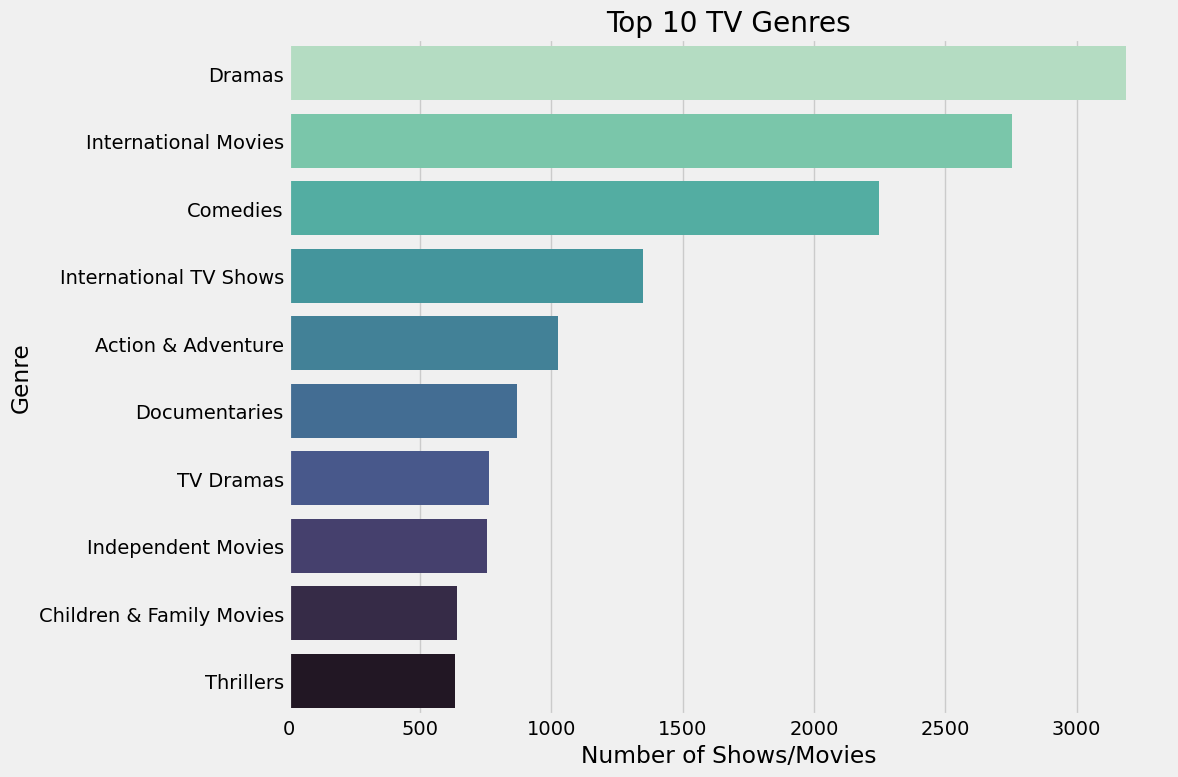

In [20]:
genre_order = cat_df['categories'].head(10)

# Create vertical bar plot
f, ax = plt.subplots(figsize=(12, 8))  # Optional: adjust figure size
sns.barplot(y="categories",x='CategoryCount',data=cat_df, palette="mako_r",order=genre_order,ax=ax)

# Add title and labels
plt.title('Top 10 TV Genres')
plt.xlabel('Number of Shows/Movies')
plt.ylabel('Genre')

# Show plot
plt.tight_layout()  # Optional: adjust layout
plt.show()